In [1]:
from receptive_fields.util.experiment_setup import load_model, load_dataset, setup_dataset_transforms
from receptive_fields.util.files import find_files_in_folder
from receptive_fields.util.training import validate
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [3]:
files_ = ["../models/misaligned/stride3_ks5.cfg",
          "../models/areadne_grid_factor3/stride_large_ks5.cfg",
          "../models/misaligned/stride2_ks5.cfg",
          "../models/areadne_submission/stride_large_ks5.cfg",
          "../models/misaligned/stride2_ks3.cfg",
          "../models/areadne_submission/stride_large_ks3.cfg",]
#files_ = find_files_in_folder("../models/mod3_n_channels/", ".cfg")
#files_.extend(["../models/bg_transform/mod3_no_reg_scale0.1-3.5.cfg","../models/bg_transform/mod3_retinal_scale0.1-3.5.cfg", "../models/bg_transform/mod3_bottleneck_scale0.1-3.5.cfg"])

In [4]:
#files_=np.array(files_)[np.array(["no_scale" not in f for f in files_])]

In [5]:
# files_ = find_files_in_folder("../models/mod3_n_channels", ".cfg")
# files_=np.array(files_)[np.array(["_lgn" in f for f in files_])]

In [6]:
model_paths = [f[:-4] for f in files_]
# model_paths = ["../models/bg_transform/mod3_retinal_scale0.1-3.5","../models/bg_transform/mod3_retinal_scale0.1-3.5_r3", "../models/mod3_n_channels/mod3_ch24", "../models/mod3_n_channels/mod3_ch32", "../models/mod3_n_channels/mod3_ch48"]

In [7]:
test_scales = [0.1,0.23,0.37,0.5,0.7,0.9,1,1.1,1.3,1.5,2,2.5,3,3.7]
accuracies = []
test_data = load_dataset(train_data=False, test_data=True, enable_img_transforms=True, min_resize=test_scales[0], max_resize=test_scales[0])
for model_path in model_paths:
    model = load_model(model_path)
    model.to(device)
    model_accs = []
    for scale in tqdm(test_scales):
        transforms = setup_dataset_transforms(enable_img_transforms=True, min_resize=scale, max_resize=scale)
        test_data.transform = transforms
        test_loader = DataLoader(test_data, batch_size=512, shuffle=False)
        model_accs.append(validate(model, test_loader, device, abort_batch=1))
    accuracies.append(model_accs)

Files already downloaded and verified


2it [00:02,  1.27s/it][00:00<?, ?it/s]
2it [00:01,  1.98it/s][00:02<00:33,  2.54s/it]
2it [00:01,  1.88it/s][00:03<00:19,  1.65s/it]
2it [00:01,  1.96it/s][00:04<00:15,  1.38s/it]
2it [00:01,  1.97it/s][00:05<00:12,  1.24s/it]
2it [00:01,  1.98it/s][00:06<00:10,  1.16s/it]
2it [00:00,  2.31it/s][00:07<00:08,  1.11s/it]
2it [00:00,  2.10it/s][00:08<00:07,  1.04s/it]
2it [00:00,  2.04it/s][00:09<00:06,  1.01s/it]
2it [00:01,  1.74it/s][00:10<00:05,  1.00s/it]
2it [00:01,  1.71it/s] [00:11<00:04,  1.05s/it]
2it [00:01,  1.64it/s] [00:12<00:03,  1.09s/it]
2it [00:01,  1.57it/s] [00:14<00:02,  1.13s/it]
2it [00:01,  1.55it/s] [00:15<00:01,  1.17s/it]
100%|██████████| 14/14 [00:16<00:00,  1.19s/it]
2it [00:00,  2.22it/s][00:00<?, ?it/s]
2it [00:00,  2.46it/s][00:00<00:11,  1.10it/s]
2it [00:00,  2.61it/s][00:01<00:10,  1.17it/s]
2it [00:00,  2.66it/s][00:02<00:09,  1.22it/s]
2it [00:00,  2.62it/s][00:03<00:07,  1.26it/s]
2it [00:00,  2.59it/s][00:04<00:07,  1.27it/s]
2it [00:00,  2.42it/s][0

In [8]:
for i, path in enumerate(model_paths):
    print(str(i)+": "+ path)

0: ../models/misaligned/stride3_ks5
1: ../models/areadne_grid_factor3/stride_large_ks5
2: ../models/misaligned/stride2_ks5
3: ../models/areadne_submission/stride_large_ks5
4: ../models/misaligned/stride2_ks3
5: ../models/areadne_submission/stride_large_ks3


In [9]:
plot_nos = [i for i in range(len(files_))]#[8,10,0,1,2,3,4]

In [10]:
x = np.array(test_scales)
y = np.array(accuracies)[plot_nos].T

In [11]:
colors=[
        (0.2,0.2,0.5),
        (0.2,0.2,0.8),
        (0.5,0.2,0.2),
        (0.8,0.2,0.2),
        (0.2,0.5,0.2),
        (0.2,0.8,0.2),
        (0.2,1,0.2)
        ]
colors.extend(colors)

In [12]:
import matplotlib as mpl
import palettable
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", palettable.colorbrewer.qualitative.Paired_10.mpl_colors)

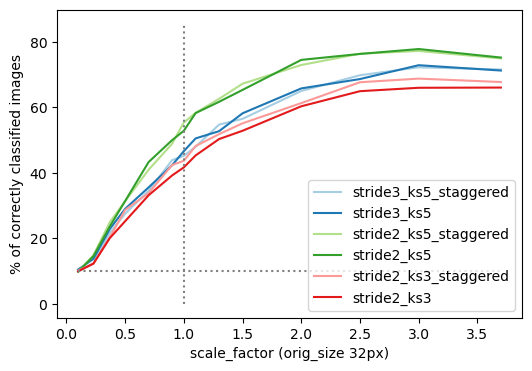

In [21]:
plt.figure(figsize=(6,4))
for y_, c in zip(y.T[::-1], colors):
    plt.plot(x, y_)#, color=c)
plt.vlines(1, 0, y.max()*1.1, colors="grey", linestyles="dotted", label="orig size")
plt.hlines(10, x.min(), x.max(), colors="grey", linestyles="dotted")
plt.legend([osp.split(model_paths[plot_nos[i]])[1] + "_staggered" if i%2==0 else osp.split(model_paths[plot_nos[i-1]])[1] for i in range(len(plot_nos))])
# plt.legend(["multiscale training", "train at default size"])
plt.ylabel("% of correctly classified images")
plt.xlabel("scale_factor (orig_size 32px)")
# plt.xscale("log")
plt.show()